# Taco data exploration

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Loading

In [3]:
# Load dataset
df = pd.read_csv('taco_sales_(2024-2025).csv')

# Preview
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False


## Description

In [4]:
df.shape

(1000, 13)

In [5]:
df.describe()

,Order ID,Delivery Duration (min),Toppings Count,Distance (km),Price ($),Tip ($)
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,552504.865000,50.93000,2.529000,13.073420,6.908250,1.806110
std,255948.779709,23.22754,1.717005,7.142268,2.310137,1.132035
min,101139.000000,10.00000,0.000000,0.510000,3.000000,0.010000
25%,331796.750000,30.00000,1.000000,6.972500,4.500000,0.907500
50%,559740.000000,53.00000,3.000000,13.200000,6.750000,1.760000
75%,771781.750000,71.00000,4.000000,19.242500,9.250000,2.520000
max,999138.000000,90.00000,5.000000,24.980000,10.750000,4.980000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1000 non-null   int64  
 1   Restaurant Name          1000 non-null   object 
 2   Location                 1000 non-null   object 
 3   Order Time               1000 non-null   object 
 4   Delivery Time            1000 non-null   object 
 5   Delivery Duration (min)  1000 non-null   int64  
 6   Taco Size                1000 non-null   object 
 7   Taco Type                1000 non-null   object 
 8   Toppings Count           1000 non-null   int64  
 9   Distance (km)            1000 non-null   float64
 10  Price ($)                1000 non-null   float64
 11  Tip ($)                  1000 non-null   float64
 12  Weekend Order            1000 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 94.9+ KB


In [7]:
df.nunique()

Order ID                   1000
Restaurant Name              10
Location                     10
Order Time                 1000
Delivery Time               999
Delivery Duration (min)      81
Taco Size                     2
Taco Type                     5
Toppings Count                6
Distance (km)               811
Price ($)                    12
Tip ($)                     376
Weekend Order                 2
dtype: int64

## Data cleaning

In [8]:
df['Order Time'] = pd.to_datetime(df['Order Time'], format="%d-%m-%Y %H:%M")
df['Delivery Time'] = pd.to_datetime(df['Delivery Time'], format="%d-%m-%Y %H:%M")
df

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,2024-08-01 14:55:00,2024-08-01 15:36:00,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,2024-11-23 17:11:00,2024-11-23 17:25:00,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,2024-11-21 20:24:00,2024-11-21 21:02:00,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,2024-09-21 06:43:00,2024-09-21 07:28:00,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,2024-07-24 11:01:00,2024-07-24 11:16:00,15,Large,Pork Taco,0,24.34,4.50,1.14,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164891,La Vida Taco,Austin,2024-05-27 11:12:00,2024-05-27 12:11:00,59,Large,Veggie Taco,2,20.04,7.00,2.80,False
996,232442,The Taco Stand,San Antonio,2025-04-03 20:51:00,2025-04-03 21:29:00,38,Regular,Fish Taco,0,13.69,3.00,1.38,False
997,251729,Urban Tacos,Houston,2025-01-23 05:33:00,2025-01-23 06:41:00,68,Regular,Pork Taco,2,4.07,5.50,2.00,False
998,940215,Taco Fiesta,San Antonio,2024-09-05 15:49:00,2024-09-05 16:38:00,49,Regular,Veggie Taco,5,14.56,9.25,1.89,False


In [9]:
df_more = df

df_more['Order Hour'] = df_more['Order Time'].dt.hour
df_more['Day of Week'] = df_more['Order Time'].dt.day_name()
df_more['Tip %'] = round((df_more['Tip ($)'] / df_more['Price ($)']) * 100)

df_more

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order,Order Hour,Day of Week,Tip %
0,770487,El Taco Loco,New York,2024-08-01 14:55:00,2024-08-01 15:36:00,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,14,Thursday,24.0
1,671858,El Taco Loco,San Antonio,2024-11-23 17:11:00,2024-11-23 17:25:00,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,17,Saturday,71.0
2,688508,Taco Haven,Austin,2024-11-21 20:24:00,2024-11-21 21:02:00,38,Large,Pork Taco,2,20.33,7.00,0.02,False,20,Thursday,0.0
3,944962,Spicy Taco House,Dallas,2024-09-21 06:43:00,2024-09-21 07:28:00,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,6,Saturday,35.0
4,476417,Casa del Taco,San Antonio,2024-07-24 11:01:00,2024-07-24 11:16:00,15,Large,Pork Taco,0,24.34,4.50,1.14,False,11,Wednesday,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164891,La Vida Taco,Austin,2024-05-27 11:12:00,2024-05-27 12:11:00,59,Large,Veggie Taco,2,20.04,7.00,2.80,False,11,Monday,40.0
996,232442,The Taco Stand,San Antonio,2025-04-03 20:51:00,2025-04-03 21:29:00,38,Regular,Fish Taco,0,13.69,3.00,1.38,False,20,Thursday,46.0
997,251729,Urban Tacos,Houston,2025-01-23 05:33:00,2025-01-23 06:41:00,68,Regular,Pork Taco,2,4.07,5.50,2.00,False,5,Thursday,36.0
998,940215,Taco Fiesta,San Antonio,2024-09-05 15:49:00,2024-09-05 16:38:00,49,Regular,Veggie Taco,5,14.56,9.25,1.89,False,15,Thursday,20.0


### There are no duplicates in the dataset so this cell below is redundant

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df[df['Delivery Duration (min)'] < 0]  # Checking for anomalies

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order,Order Hour,Day of Week,Tip %


## Spread of the data

In [12]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order,Order Hour,Day of Week,Tip %
0,770487,El Taco Loco,New York,2024-08-01 14:55:00,2024-08-01 15:36:00,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,14,Thursday,24.0
1,671858,El Taco Loco,San Antonio,2024-11-23 17:11:00,2024-11-23 17:25:00,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,17,Saturday,71.0
2,688508,Taco Haven,Austin,2024-11-21 20:24:00,2024-11-21 21:02:00,38,Large,Pork Taco,2,20.33,7.00,0.02,False,20,Thursday,0.0
3,944962,Spicy Taco House,Dallas,2024-09-21 06:43:00,2024-09-21 07:28:00,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,6,Saturday,35.0
4,476417,Casa del Taco,San Antonio,2024-07-24 11:01:00,2024-07-24 11:16:00,15,Large,Pork Taco,0,24.34,4.50,1.14,False,11,Wednesday,25.0


### Histograms of numerical data fields

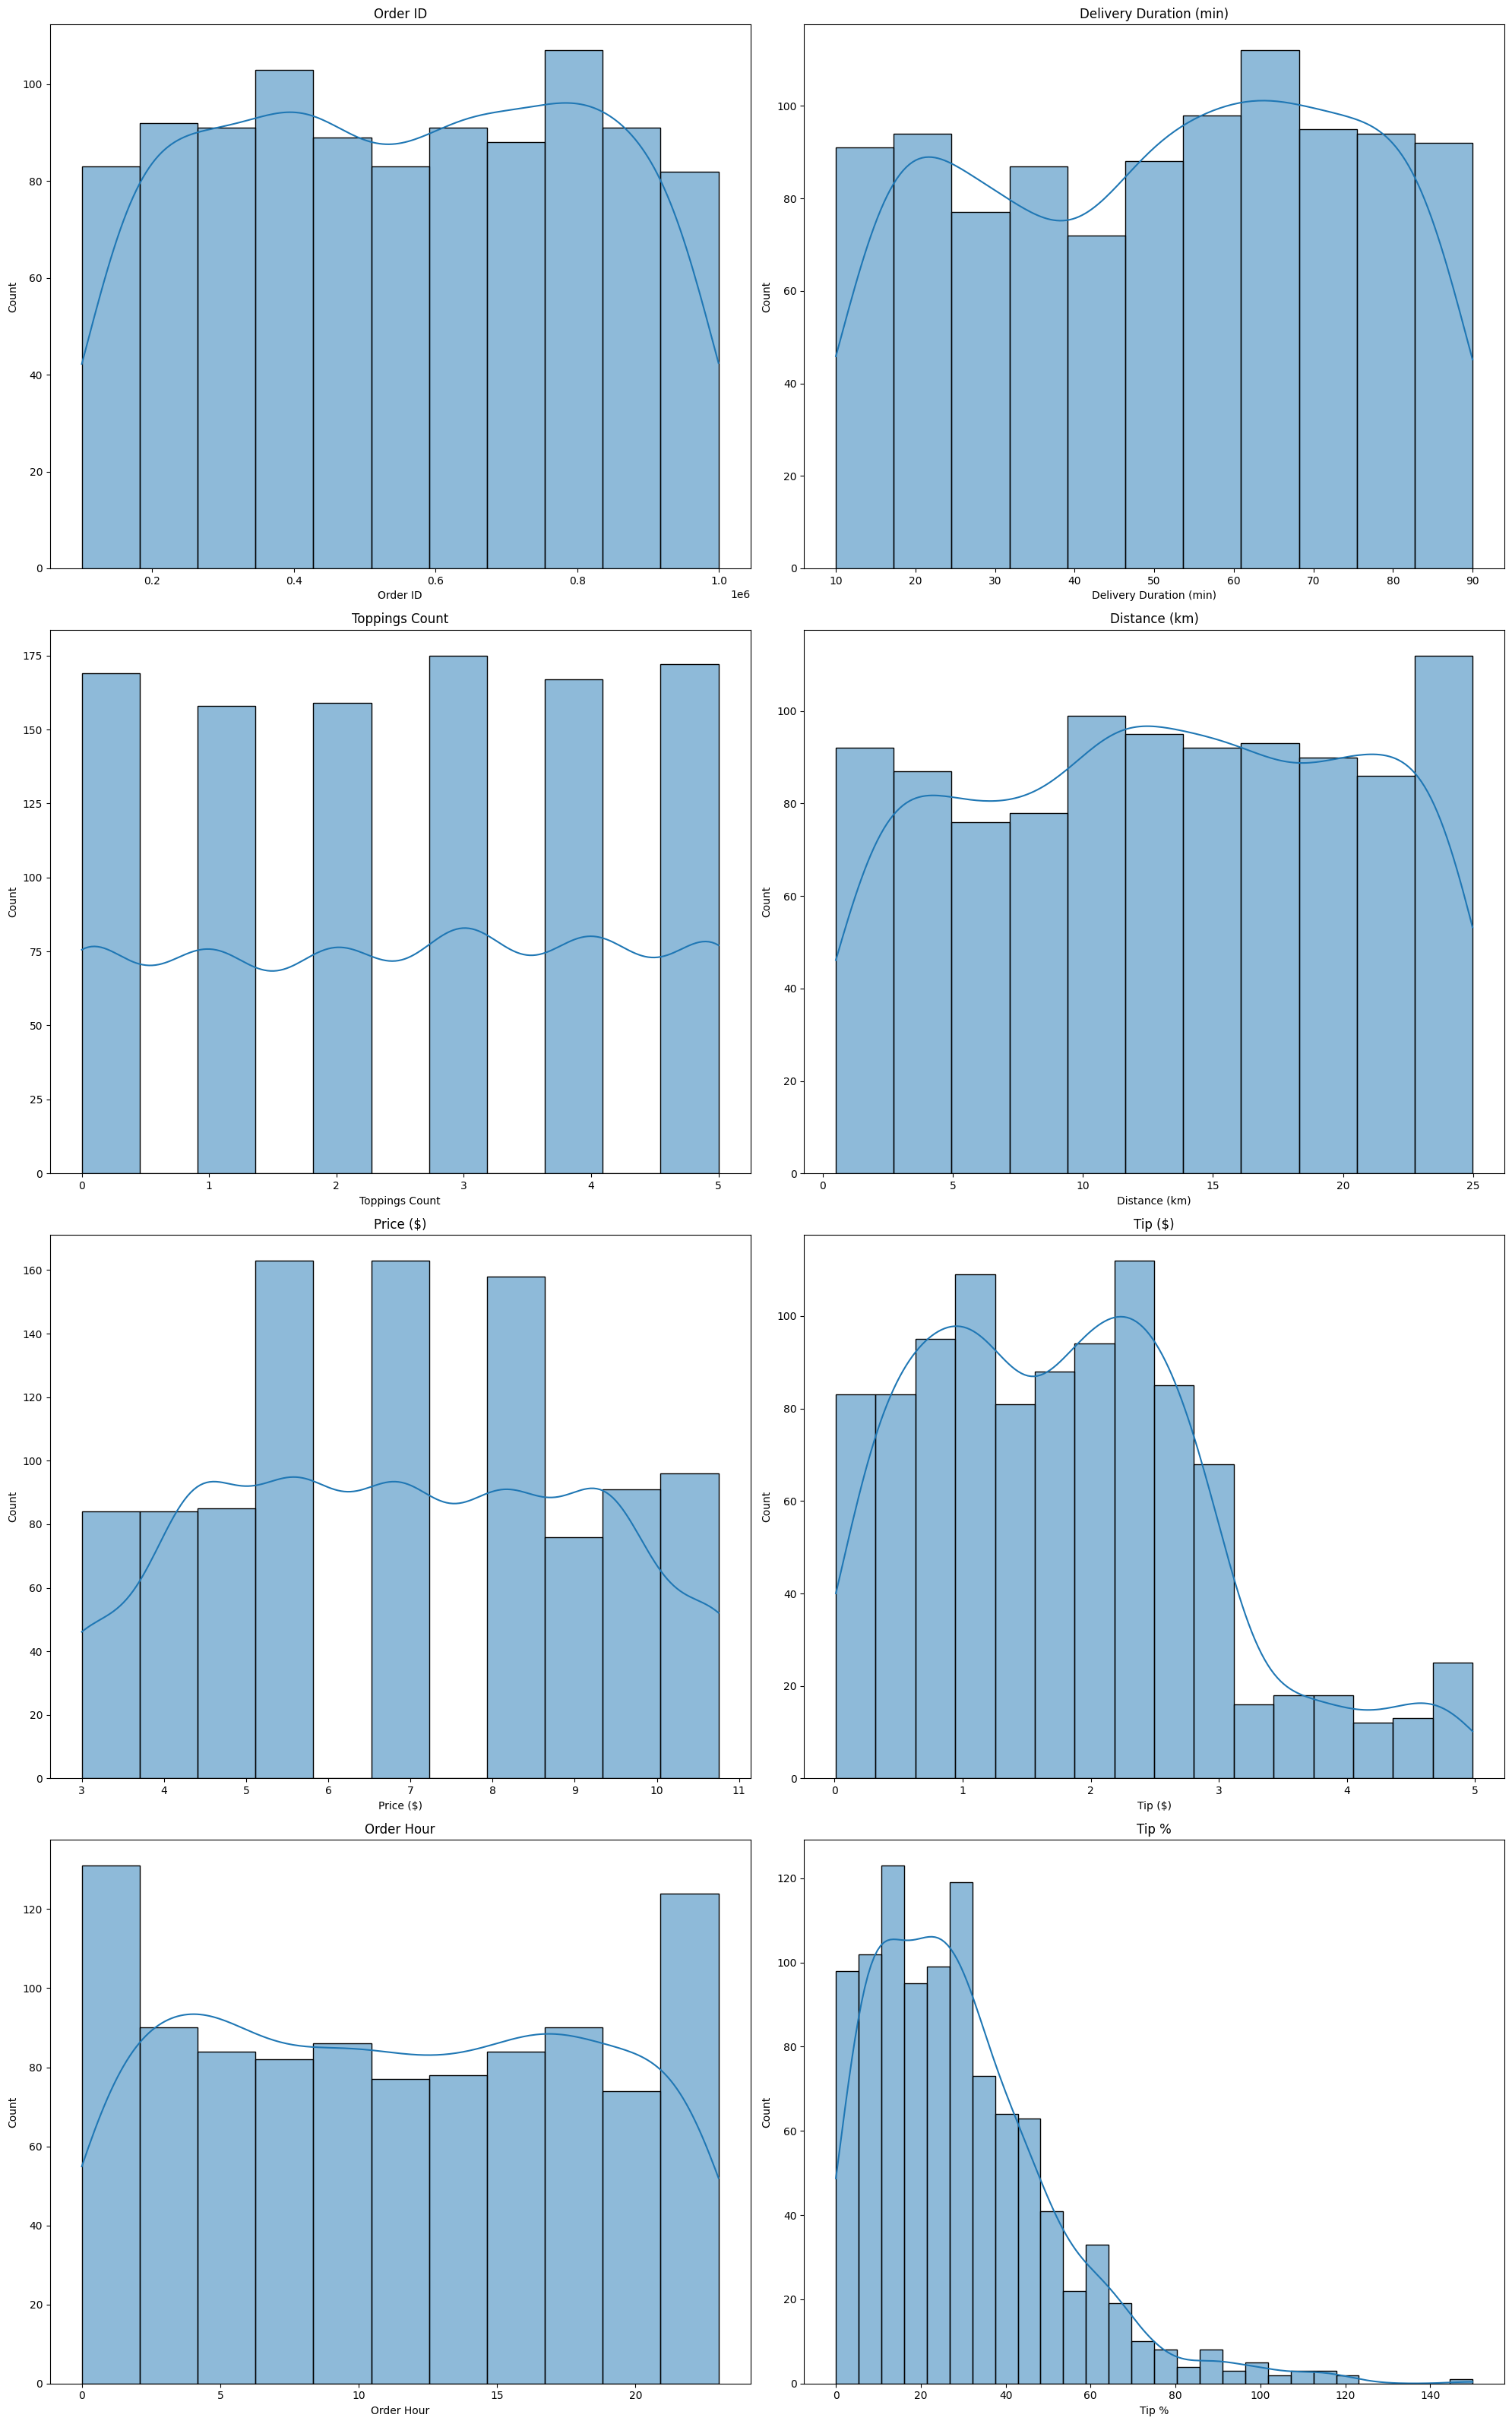

In [13]:
onlyNumbers = df.select_dtypes(include="number")

fig, axes = plt.subplots(nrows=len(onlyNumbers.columns)//2, ncols=2, figsize=(20, len(onlyNumbers.columns)*4))

axes = axes.flatten()

for idx, col in enumerate(onlyNumbers):
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx])
    axes[idx].set_title(col)

plt.tight_layout()
plt.show()

### Spread of categorical data

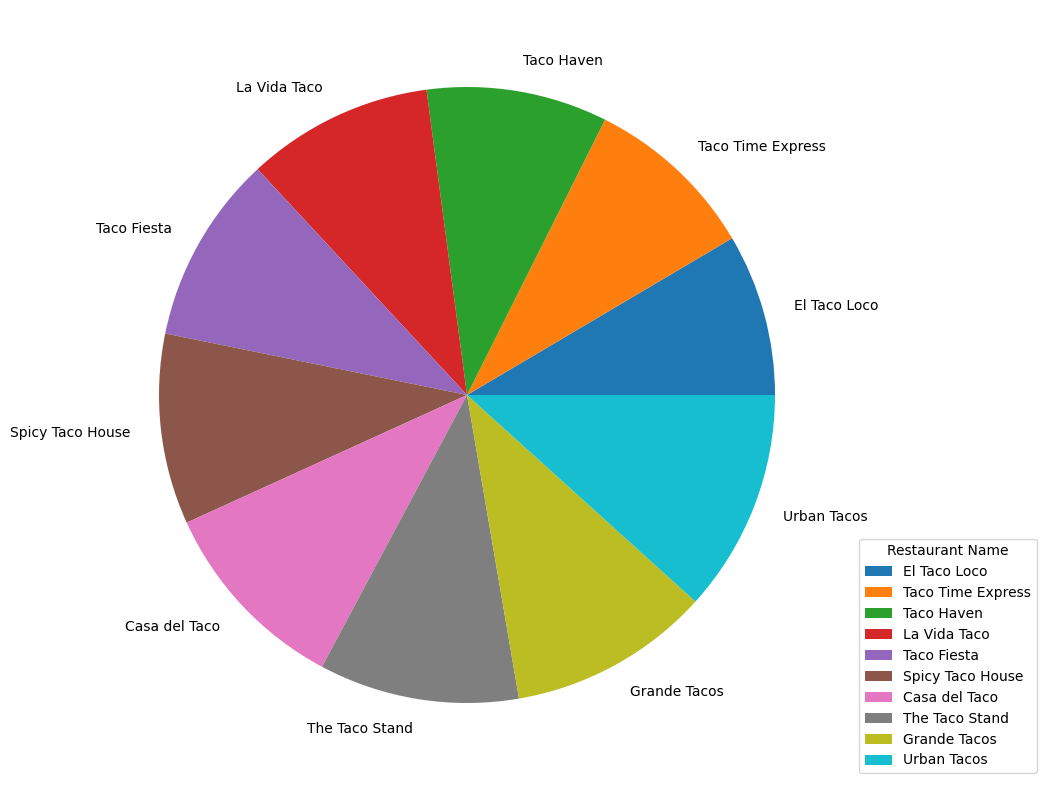

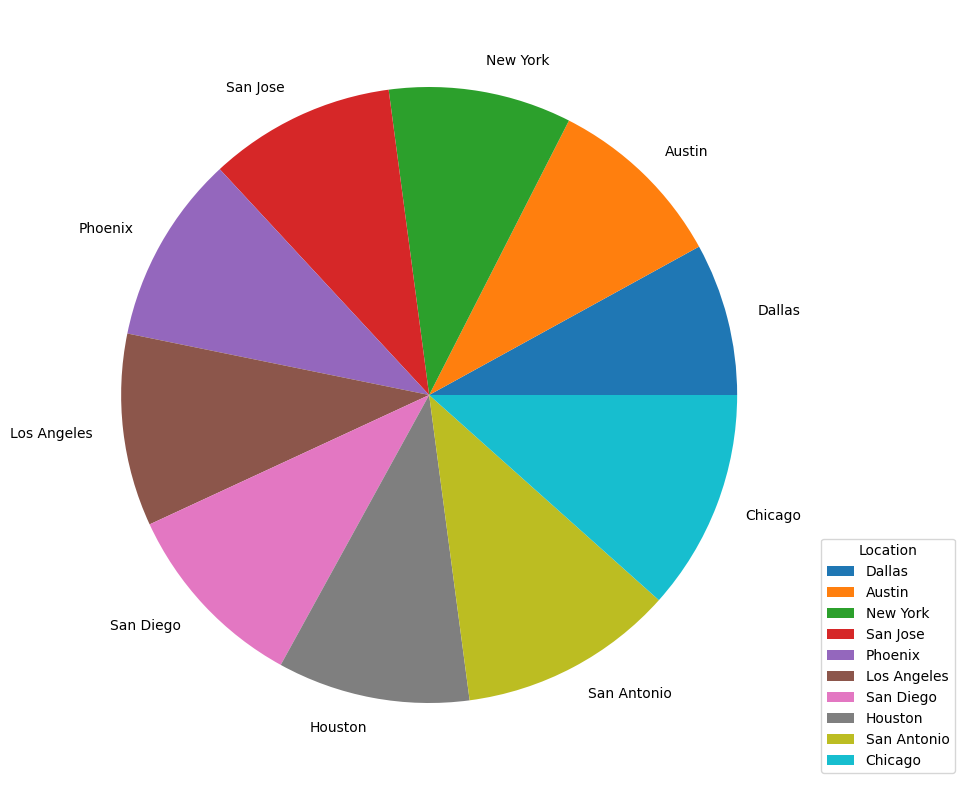

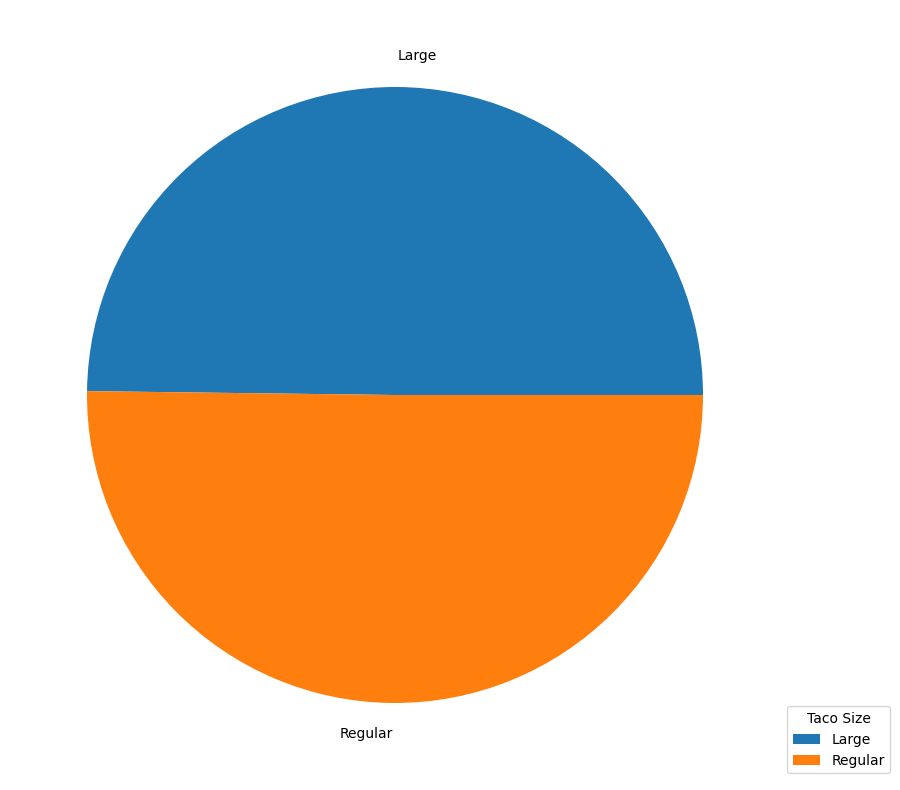

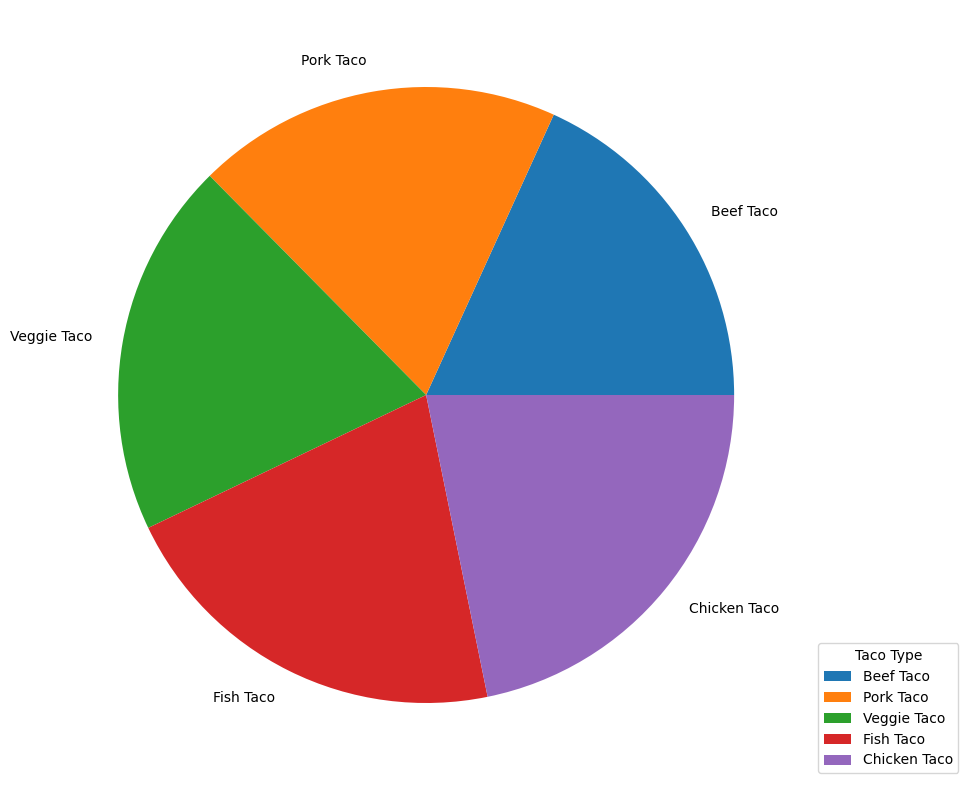

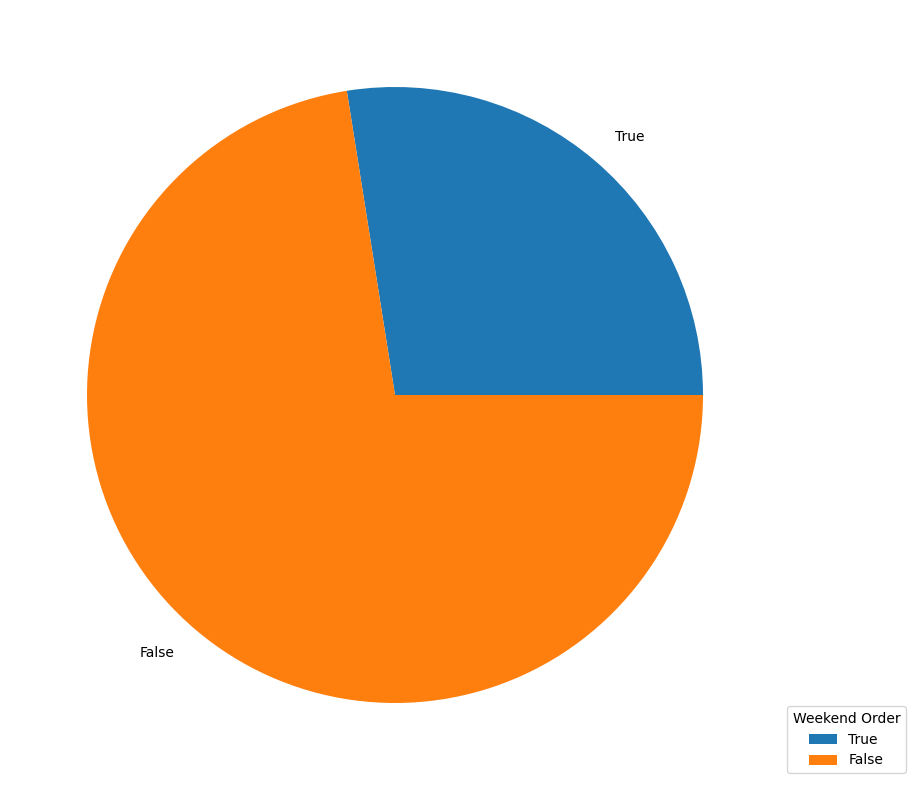

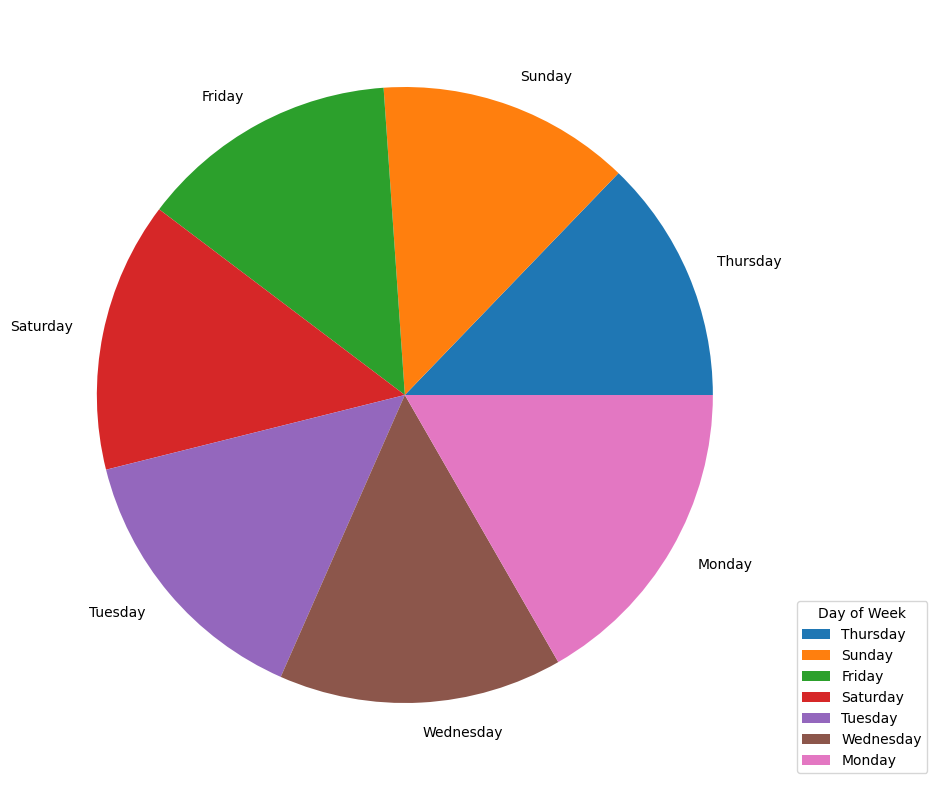

In [14]:
# cmap = plt.get_cmap("plasma")


for colName in df.select_dtypes(exclude=["number", "datetime"]):
    fig, ax = plt.subplots(figsize=(20,10))

    restaurantCounts = df.groupby(colName).count().sort_values("Order ID")["Order ID"]

    wedges, texts = plt.pie(restaurantCounts, labels=restaurantCounts.index)

    ax.legend(wedges, restaurantCounts.index,
          title=colName,
          loc="lower left",
          bbox_to_anchor=(1, 0, 0.5, 1))

    plt.show()


### Delivery Time vs Tip %

#### The graph does not show any correlation between the delivery time and the tip percentage

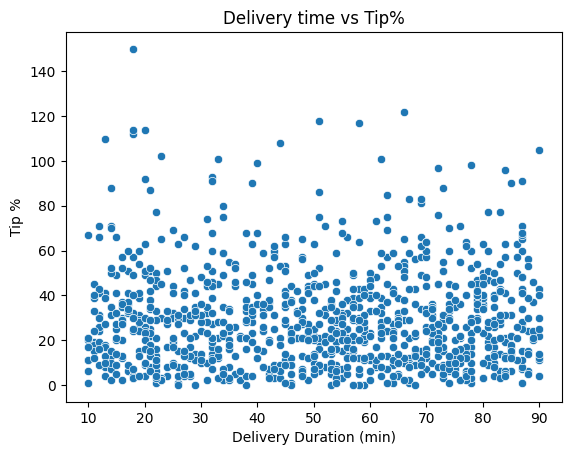

In [15]:
sns.scatterplot(x='Delivery Duration (min)', y='Tip %', data=df_more)
plt.title("Delivery time vs Tip%")
plt.show()

### Price vs Toppings Count

#### The type of the taco does not seem to change the price of the taco but the size does. Large tacos cost more than small tacos. The number of toppings also increases the price

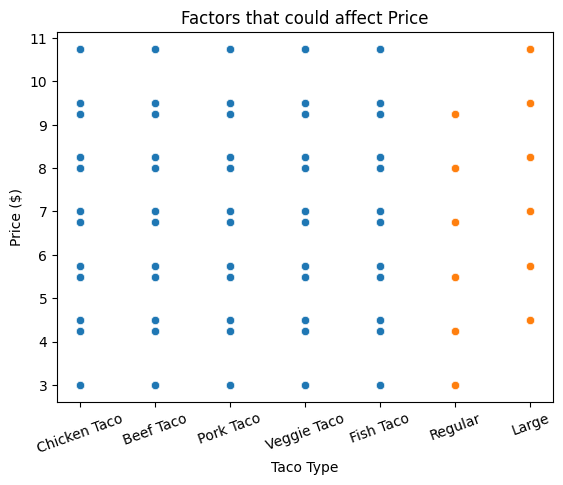

In [16]:
for colName in ["Taco Type", "Taco Size"]:

    sns.scatterplot(x=colName, y='Price ($)', data=df_more)

plt.xticks(rotation=20)
plt.title(f"Factors that could affect Price")
plt.show()



#### Each additional topping costs $1.25 extra to the total and making it a large taco costs $1.50

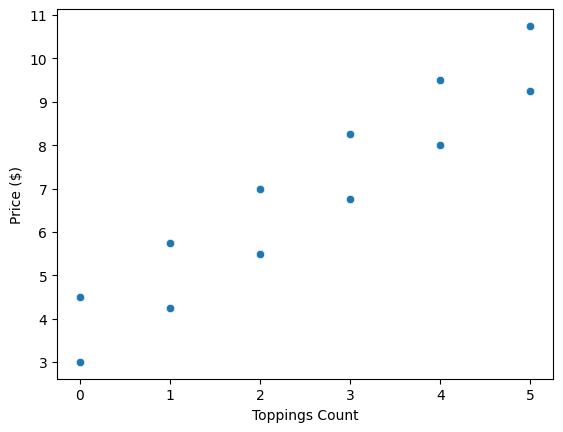

In [17]:
sns.scatterplot(x="Toppings Count", y='Price ($)', data=df_more)
plt.show()

#### 

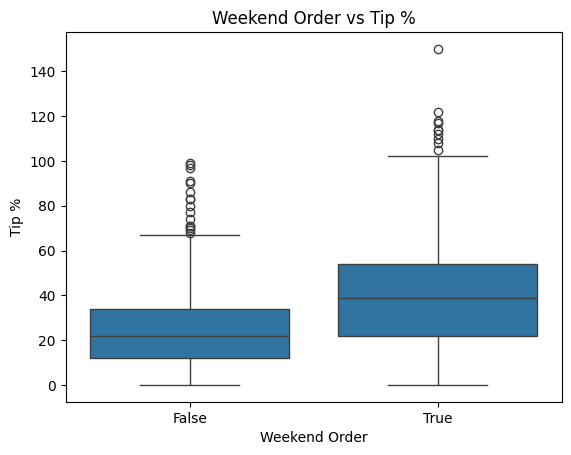

In [18]:
sns.boxplot(x='Weekend Order', y='Tip %', data=df_more)
plt.title("Weekend Order vs Tip %")
plt.show()

### Taco Type vs Tip %

<BarContainer object of 5 artists>

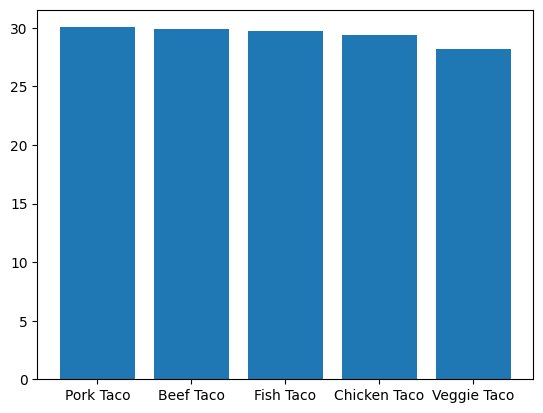

In [20]:
tacoTip = df.groupby('Taco Type')['Tip %'].mean().sort_values(ascending=False)

plt.bar(tacoTip.index, tacoTip.values)

### Location vs Price and Tip %

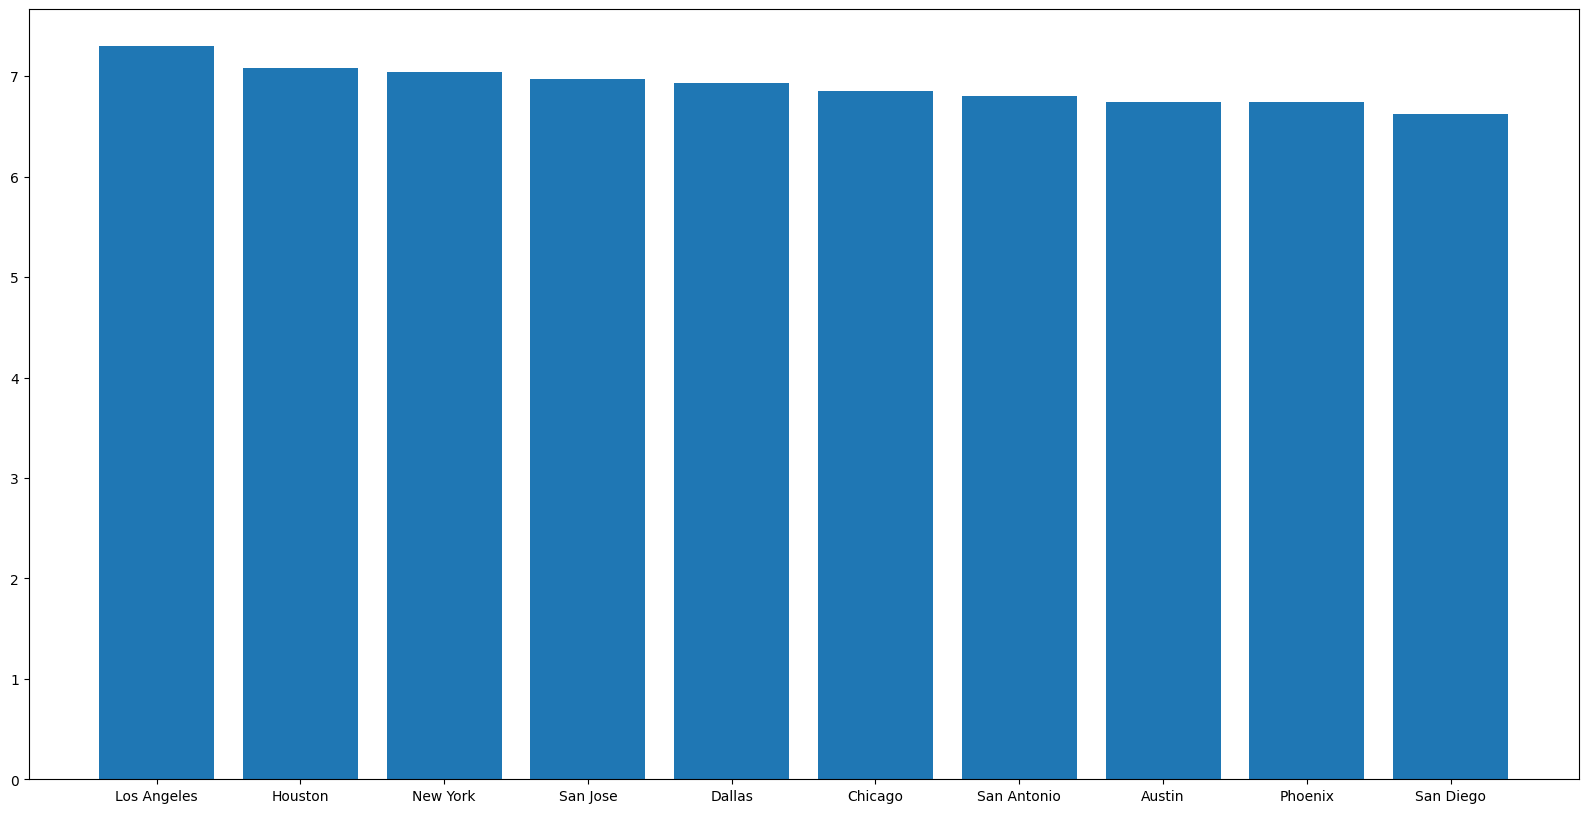

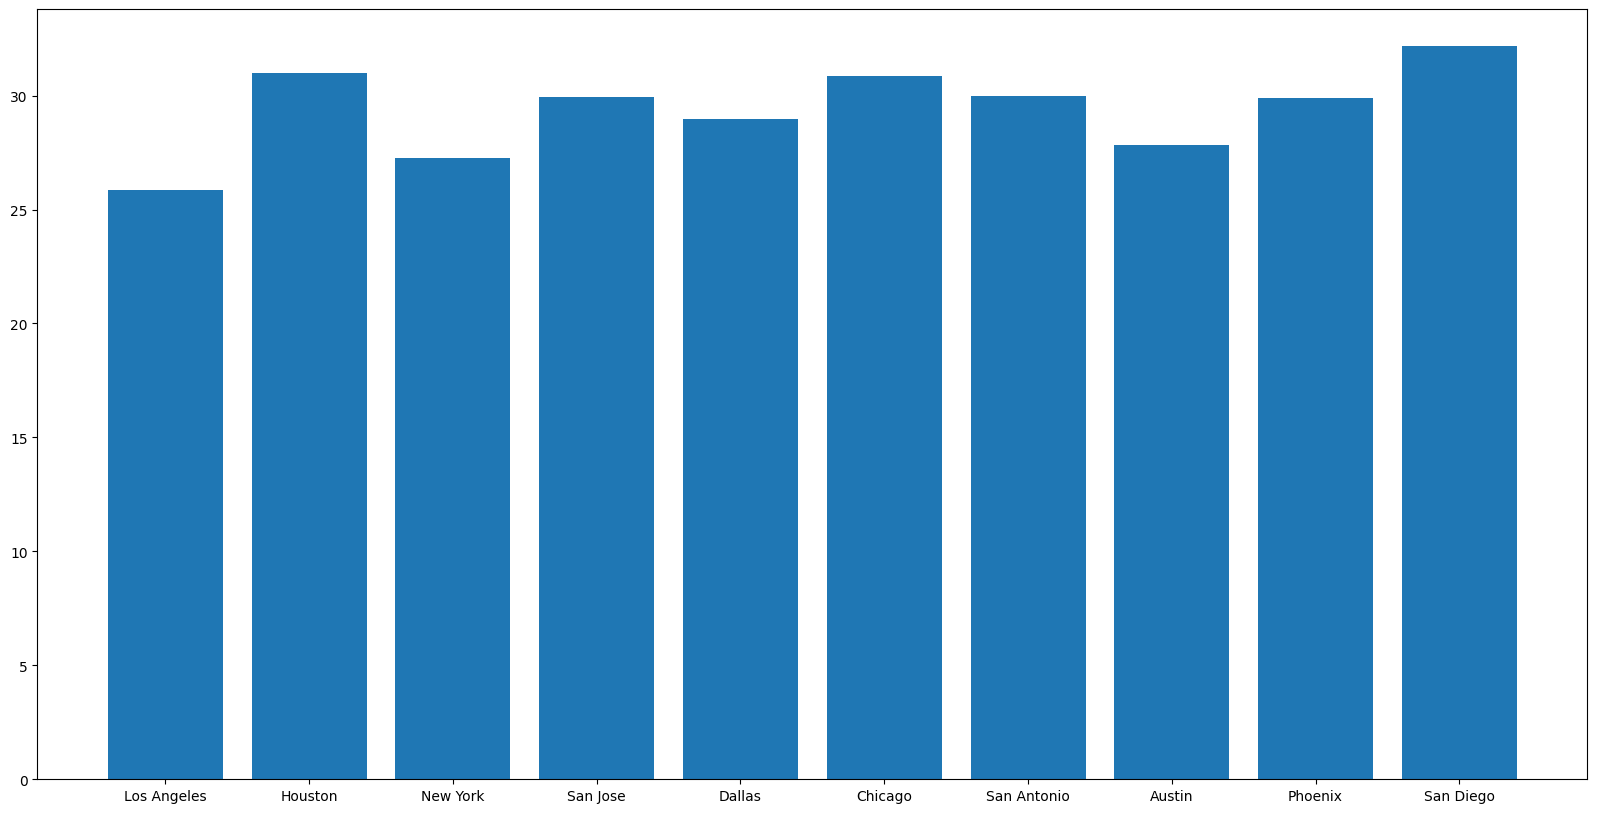

In [21]:
locPriceTip = df.groupby('Location')[['Price ($)', 'Tip %']].mean().sort_values('Price ($)', ascending=False)

fig, ax = plt.subplots(figsize=[20,10])

plt.bar(locPriceTip.index, locPriceTip["Price ($)"])
plt.show()

fig, ax = plt.subplots(figsize=[20,10])

plt.bar(locPriceTip.index, locPriceTip["Tip %"])
plt.show()

## Conclusion

From my analysis, this dataset is synthetic. I have this conclusion because the data is very regular and shows very simple patterns with a small amount of noise. This is most evident in the spread of the categorical data. There are also other points that aid in this conclusion, namely that some data which should show a strong (or at least any correlation) does not show any at all. The example I am specifically referring to is the delivery time vs the tip percentage. Even though this may be possible, in my opinion it points to the data having superficial correlation because of a lack of sophistication by the producer of this dataset.